In [1]:
import pandas as pd

In [2]:
#Loading the training and testing data

import pandas as pd
df_train = pd.read_csv('C:/Users/Raghul/Desktop/Mood/dataset/training/train_lyrics_1000.csv')
df_test = pd.read_csv('C:/Users/Raghul/Desktop/Mood/dataset/validation/valid_lyrics_200.csv')

df_train.tail()

,file,artist,title,lyrics,genre,mood,year
995,TRBIGRY128F42597B3.h5,Sade,All About Our Love,Its all about our love\nSo shall it be forever...,R&B,sad,2000
996,TRBIIEU128F9307C88.h5,New Found Glory,Don't Let Her Pull You Down,It's time that I rain on your parade\nWatch as...,Rock,happy,2009
997,TRBIIJY12903CE4755.h5,Mindy McCready,Ten Thousand Angels,Speakin of the devil\nLook who just walked in\...,Country,happy,1996
998,TRBIIOT128F423C594.h5,Joy Division,Leaders Of Men,Born from some mother's womb\nJust like any ot...,Rock,sad,1978
999,TRBIJYB128F14AE326.h5,Seventh Day Slumber,Shattered Life,"This wanting more from me is tearing me, it's ...",Rock,sad,2005


In [3]:
# Label encoder
#converts the mood label of the data to binary 0 and 1

import pickle
import numpy as np

X_train = df_train['lyrics']
y_train = df_train['mood']

X_test = df_test['lyrics']
y_test = df_test['mood']

pickle_in = open('C:/Users/Raghul/Desktop/label_encoder.p', 'rb')
le = pickle.load(pickle_in)
pickle_in.close()

print('before: %s ...' %y_train[:5])

y_train = le.transform(y_train)
y_test = le.transform(y_test)

print('after: %s ...' %y_train[:5])

before: 0      sad
1    happy
2      sad
3    happy
4      sad
Name: mood, dtype: object ...
after: [1 0 1 0 1] ...


In [4]:
# Loading th etop words and semantic words for Random forest training
import pickle
stop_words = pickle.load(open('C:/Users/Raghul/Desktop/stopwords.p', 'rb'))
semantic_words = pickle.load(open('C:/Users/Raghul/Desktop/whitelist_dicts/semantic_words_py34.p', 'rb'))

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import EnglishStemmer

porter = PorterStemmer()
snowball = EnglishStemmer()

# raw words
tokenizer = lambda text: text.split()

# words after Porter stemming 
tokenizer_porter = lambda text: [porter.stem(word) for word in text.split()]

# Words after Snowball stemming
tokenizer_snowball = lambda text: [snowball.stem(word) for word in text.split()]

# Only words that are in a list of 'positive' or 'negative' words ('whitelist')
# http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon
tokenizer_whitelist = lambda text: [word for word in text.split() if word in semantic_words]

# Porter-stemmed words in whitelist
tokenizer_porter_wl = lambda text: [porter.stem(word) for word in text.split() if word in semantic_words]

# Snowball-stemmed words in whitelist
tokenizer_snowball_wl = lambda text: [snowball.stem(word) for word in text.split() if word in semantic_words]

In [6]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from mlxtend.preprocessing import DenseTransformer
#CountVectorizer with raw words
vect_1 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)
#CountVectorizer with Porter stemmed words
vect_2 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
#CountVectorizer with Snowball stemmed words   
vect_3 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)  
#CountVectorizer with semantic words(whitelist)
vect_4 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)  
#porter stemmed whitlist words - countvectorizer
vect_5 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)
#snowball stemmed whitelist words - countvectorizer
vect_6 = CountVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)

# Repeated all of the above with TdidfVectorizer

vect_7 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer)

vect_8 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter)
    
vect_9 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball)

vect_10 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_whitelist)    

vect_11 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_porter_wl)

vect_12 = TfidfVectorizer(binary=False,
                         stop_words=stop_words,
                         ngram_range=(1,1),
                         preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                         tokenizer=tokenizer_snowball_wl)


pipelines = []
vectorizers = [vect_1, vect_2, vect_3, vect_4, vect_5, vect_6, vect_7, vect_8, vect_9, vect_10, vect_11, vect_12]
for v in vectorizers:
    pipelines.append(Pipeline([('vect', v),
                               ('dense', DenseTransformer()),
                               ('clf', RandomForestClassifier(n_estimators=100))]))

In [16]:
# done before max_features was set

print('Vocabulary sizes\n')
labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]

for label, v in zip(labels, vectorizers):
    v.fit(X_train)
    print('%s: %s' % (label, len(v.vocabulary_)))

Vocabulary sizes

CountVec: 11378
CountVec porter: 8551
CountVec snowball: 8528
CountVec wl: 1666
CountVec porter+wl: 1349
CountVec snowball+wl: 1332
TfidfVec: 11378
TfidfVec porter: 8551
TfidfVec snowball: 8528
TfidfVec wl: 1666
TfidfVec porter+wl: 1349
TfidfVec snowball+wl: 1332


In [8]:

from sklearn import metrics
from sklearn import cross_validation

#Calculation ROC AUC for the different classifiers used

labels = ['CountVec', 'CountVec porter', 'CountVec snowball', 'CountVec wl', 'CountVec porter+wl','CountVec snowball+wl',
          'TfidfVec', 'TfidfVec porter', 'TfidfVec snowball', 'TfidfVec wl', 'TfidfVec porter+wl','TfidfVec snowball+wl',]



d = {'Data':labels,
     'ROC AUC (%)':[],}

for i,clf in enumerate(pipelines):
    scores = cross_validation.cross_val_score(estimator=clf, X=X_train, y=y_train, scoring='roc_auc', cv=10)
    print('classifier %s, %s: %s' % (i+1, labels[i], scores.mean()*100))
    d['ROC AUC (%)'].append('%0.2f (+/- %0.2f)' % (scores.mean()*100, scores.std()*100))

classifier 1, CountVec: 72.8307162534
classifier 2, CountVec porter: 72.3343598321
classifier 3, CountVec snowball: 74.7598058507
classifier 4, CountVec wl: 67.112216319
classifier 5, CountVec porter+wl: 69.2514561196
classifier 6, CountVec snowball+wl: 68.4897973239
classifier 7, TfidfVec: 71.0302144825
classifier 8, TfidfVec porter: 73.0902138266
classifier 9, TfidfVec snowball: 72.3513019808
classifier 10, TfidfVec wl: 67.5786501377
classifier 11, TfidfVec porter+wl: 69.3512199921
classifier 12, TfidfVec snowball+wl: 68.9943755739


In [9]:
df_perform = pd.DataFrame(d)
df_perform = df_perform['ROC AUC (%)']
df_perform.index=(labels)
df_perform

CountVec                72.83 (+/- 4.93)
CountVec porter         72.33 (+/- 3.60)
CountVec snowball       74.76 (+/- 4.97)
CountVec wl             67.11 (+/- 4.32)
CountVec porter+wl      69.25 (+/- 4.64)
CountVec snowball+wl    68.49 (+/- 5.09)
TfidfVec                71.03 (+/- 4.39)
TfidfVec porter         73.09 (+/- 3.49)
TfidfVec snowball       72.35 (+/- 5.06)
TfidfVec wl             67.58 (+/- 6.20)
TfidfVec porter+wl      69.35 (+/- 4.90)
TfidfVec snowball+wl    68.99 (+/- 5.41)
Name: ROC AUC (%), dtype: object

In [10]:
df_perform.to_csv('C:/Users/Raghul/Desktop/rand_forest_featextr_1.csv', index=False)

In [11]:
%matplotlib inline

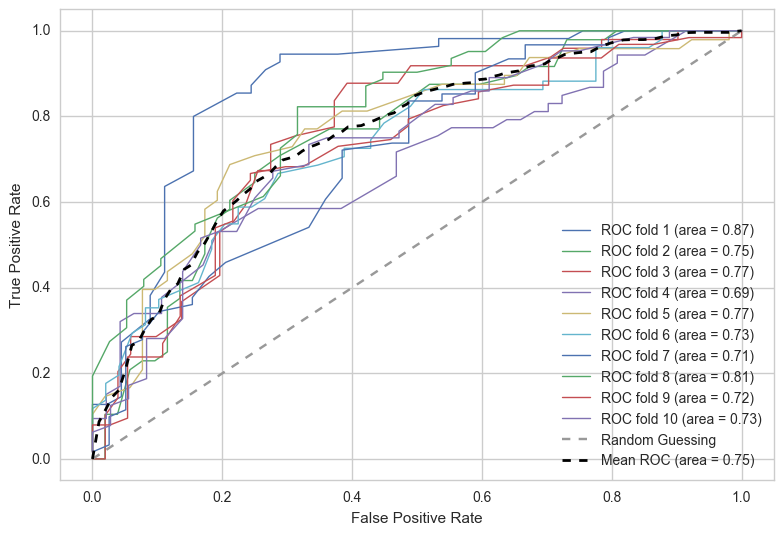

In [12]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from scipy import interp

sns.set()
sns.set_style("whitegrid")

classifier = Pipeline([('vect',   TfidfVectorizer(binary=False,
                                             stop_words=stop_words,
                                             ngram_range=(1,1),
                                             preprocessor=lambda text: re.sub('[^a-zA-Z]', ' ', text.lower()),
                                             max_features = 5000,
                                             tokenizer=lambda text: [porter.stem(word) for word in text.split()]
                )),
                ('dense', DenseTransformer()),
                ('clf', RandomForestClassifier(n_estimators=100))])


cv = KFold(y_train.shape[0], n_folds=10, random_state=123)

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.savefig('C:/Users/Raghul/Desktop/roc_tfidf_porter_1.eps', dpi=300)
plt.legend(loc="lower right")

plt.show()

In [13]:
# Custom scorer methods to account for positive-negative class labels

from sklearn import metrics

# `pos_label` for positive class, since we have sad=1, happy=0

acc_scorer = metrics.make_scorer(metrics.accuracy_score, greater_is_better=True)
pre_scorer = metrics.make_scorer(metrics.precision_score, greater_is_better=True, pos_label=0)
rec_scorer = metrics.make_scorer(metrics.recall_score, greater_is_better=True, pos_label=0)
f1_scorer = metrics.make_scorer(metrics.f1_score, greater_is_better=True, pos_label=0)
auc_scorer = metrics.make_scorer(metrics.roc_auc_score, greater_is_better=True)

In [14]:
labels = ['Train CountVec', 'Train CountVec porter', 'Train CountVec snowball', 'Train CountVec wl', 
          'Train CountVec porter+wl','Train CountVec snowball+wl',
          'Train TfidfVec', 'Train TfidfVec porter', 'Train TfidfVec snowball', 'Train TfidfVec wl', 
          'Train TfidfVec porter+wl','Train TfidfVec snowball+wl']

d = {'Data':labels,
     'ACC (%)':[],
     'PRE (%)':[],
     'REC (%)':[],
     'F1 (%)':[],
     'ROC AUC (%)':[],
}


for clf in pipelines:
    clf.fit(X_train, y_train)

for clf in pipelines:

    d['ACC (%)'].append(acc_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['PRE (%)'].append(pre_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['REC (%)'].append(rec_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['F1 (%)'].append(f1_scorer(estimator=clf, X=X_train, y_true=y_train))
    d['ROC AUC (%)'].append(auc_scorer(estimator=clf, X=X_train, y_true=y_train))

In [15]:
pd.set_option('precision', 2)

df_perform = pd.DataFrame(d)
df_perform = df_perform[['ACC (%)', 'PRE (%)', 'REC (%)', 'F1 (%)', 'ROC AUC (%)']]
df_perform.index=(labels)
df_perform = df_perform*100
df_perform = np.round(df_perform, decimals=2)
df_perform

,ACC (%),PRE (%),REC (%),F1 (%),ROC AUC (%)
Train CountVec,99.8,99.78,99.78,99.78,99.80
Train CountVec porter,99.8,99.78,99.78,99.78,99.80
Train CountVec snowball,99.8,99.78,99.78,99.78,99.80
Train CountVec wl,99.5,99.77,99.10,99.44,99.46
Train CountVec porter+wl,99.5,100.00,98.88,99.44,99.44
Train CountVec snowball+wl,99.5,100.00,98.88,99.44,99.44
Train TfidfVec,99.8,99.78,99.78,99.78,99.80
Train TfidfVec porter,99.8,100.00,99.55,99.78,99.78
Train TfidfVec snowball,99.8,99.55,100.00,99.78,99.82
Train TfidfVec wl,99.4,99.77,98.88,99.32,99.35
